In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

plt.rcParams['figure.dpi']=120
plt.rcParams['font.size']=14
plt.rcParams['figure.figsize']=(10,8)

In [2]:
df = pd.read_csv('salesmonthly.csv')

df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   datum   70 non-null     object 
 1   M01AB   70 non-null     float64
 2   M01AE   70 non-null     float64
 3   N02BA   70 non-null     float64
 4   N02BE   70 non-null     float64
 5   N05B    70 non-null     float64
 6   N05C    70 non-null     float64
 7   R03     70 non-null     float64
 8   R06     70 non-null     float64
dtypes: float64(8), object(1)
memory usage: 5.0+ KB


In [3]:
# Convert to date-time format
df[['datum']] = df[['datum']].apply(pd.to_datetime)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   datum   70 non-null     datetime64[ns]
 1   M01AB   70 non-null     float64       
 2   M01AE   70 non-null     float64       
 3   N02BA   70 non-null     float64       
 4   N02BE   70 non-null     float64       
 5   N05B    70 non-null     float64       
 6   N05C    70 non-null     float64       
 7   R03     70 non-null     float64       
 8   R06     70 non-null     float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 5.0 KB


In [5]:
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [6]:
# create year colmn
df['year'] = pd.DatetimeIndex(df['datum']).year

In [7]:
# create month column
df['month'] = pd.DatetimeIndex(df['datum']).month


df.head(10)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,year,month
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2,2014,1
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2,2014,2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4,2014,3
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7,2014,4
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7,2014,5
5,2014-06-30,112.07,94.710,122.900,548.225,323.0,23.0,57.0,109.3,2014,6
6,2014-07-31,117.06,95.010,129.300,491.900,348.0,21.0,61.0,69.1,2014,7
7,2014-08-31,134.79,99.780,123.800,583.850,420.0,29.0,37.0,70.8,2014,8
8,2014-09-30,108.78,109.094,122.100,887.820,399.0,14.0,115.0,58.8,2014,9
9,2014-10-31,154.75,185.241,191.600,1856.815,472.0,30.0,182.0,74.5,2014,10


In [9]:
df.to_csv('pharma_sales_cleaned.csv')

In [14]:
df.year.nunique()

6

In [15]:
df.year.unique()

array([2014, 2015, 2016, 2017, 2018, 2019])

In [17]:
df.isna().sum()

datum    0
M01AB    0
M01AE    0
N02BA    0
N02BE    0
N05B     0
N05C     0
R03      0
R06      0
year     0
month    0
dtype: int64

In [18]:
df.columns

Index(['datum', 'M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03',
       'R06', 'year', 'month'],
      dtype='object')

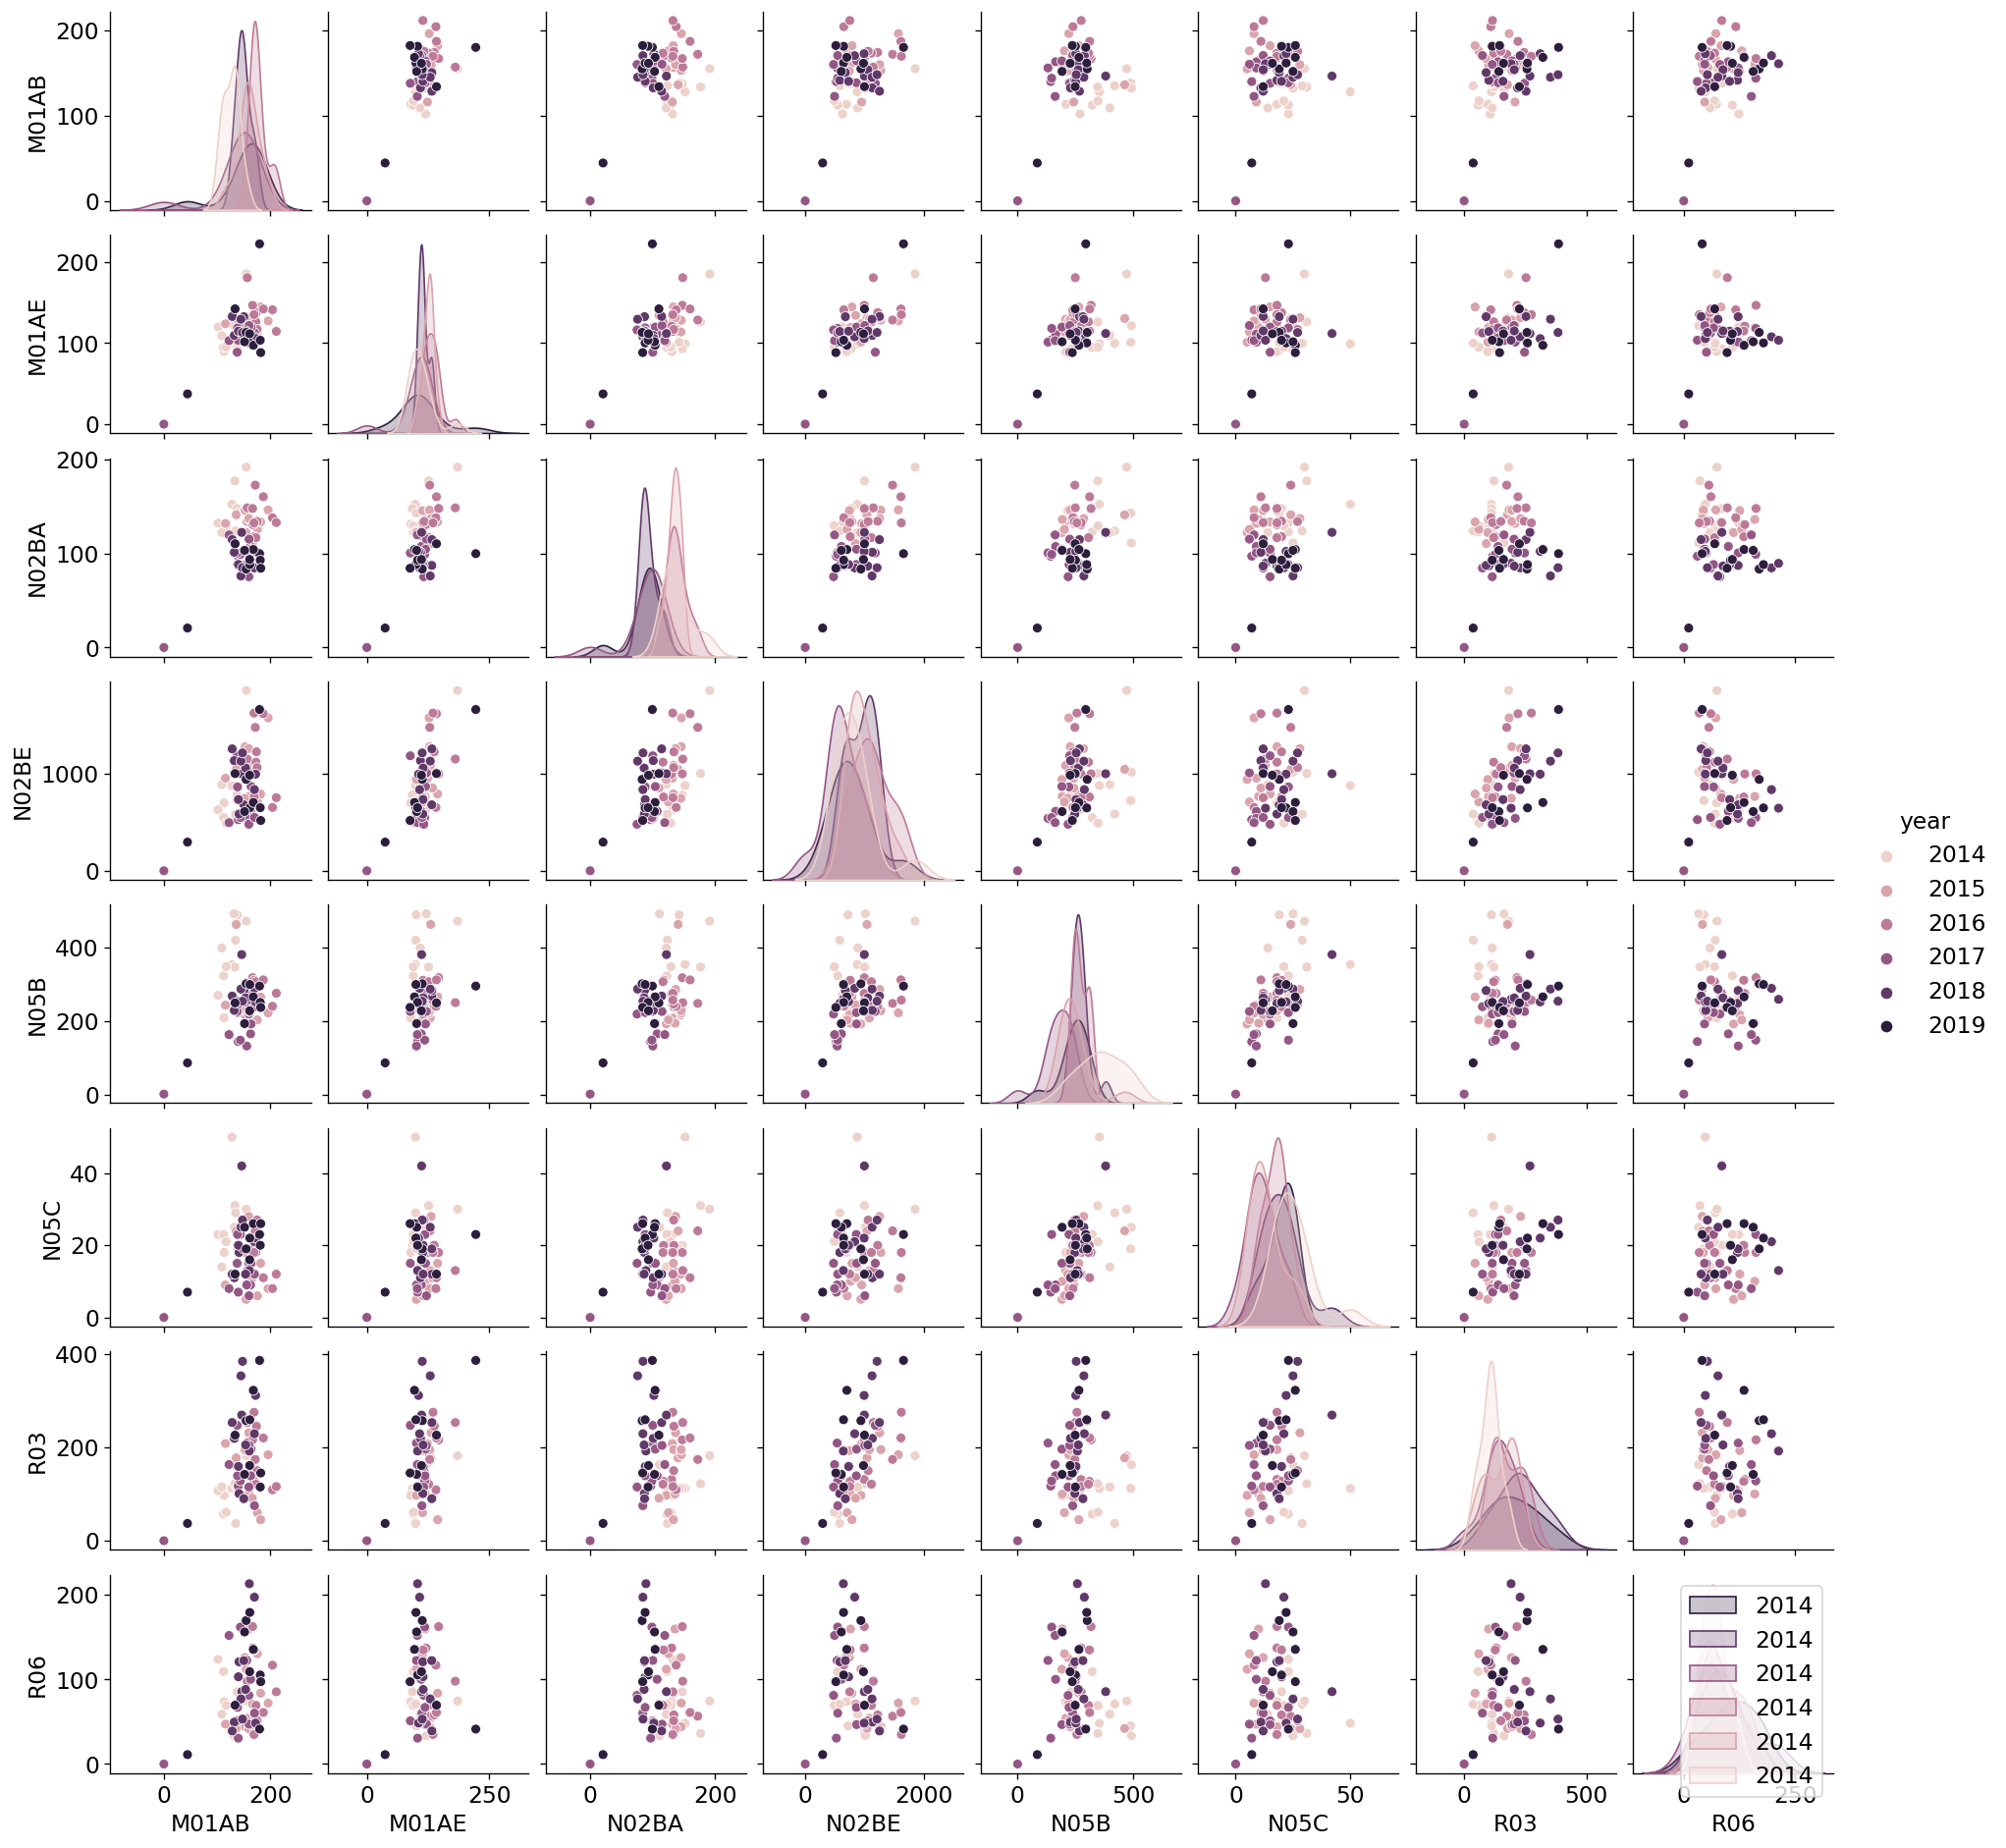

In [19]:

sns.pairplot(
    df.dropna(), 
    vars=['M01AB', 'M01AE', 'N02BA', 'N02BE','N05B', 'N05C', 'R03', 'R06'], 
    height=2.0,
    diag_kind='kde',
    hue='year')
plt.legend(df.year)
plt.show();

In [29]:
fig = px.bar(
    df,
    x='year',
    y='R06',
    color='month'
)

fig.show()